Desafio 31: Análise de Avaliações de Cursos Online

📂 Dataset: Avaliações feitas por alunos em diferentes cursos.
Colunas: Curso, Aluno, Nota, Comentário, Data_Avaliacao

🎯 Tarefas:

Trate a coluna Nota, corrigindo erros e preenchendo dados faltantes de maneira adequada.

Calcule a média de nota por curso.

Qual curso teve a maior quantidade de avaliações com nota 5?

Existe alguma diferença de média de notas entre avaliações feitas antes e depois de 2025-01-01?

Crie um gráfico de barras mostrando o número de avaliações por curso.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("dia_31_avaliacoes_cursos.csv")
df.head()

,Curso,Aluno,Nota,Comentário,Data_Avaliacao
0,Data Science,Aluno_143,3,Muito bom,2024-08-27
1,Power BI,Aluno_141,1,NaN,2024-11-22
2,Excel Avançado,Aluno_93,5,Ótimo curso!,2024-10-27
3,Data Science,Aluno_161,1,Muito bom,2024-09-23
4,Python Básico,Aluno_128,3,Não gostei,2025-03-02


In [9]:
#Trate a coluna Nota, corrigindo erros e preenchendo dados faltantes de maneira adequada.
df["Nota"] = pd.to_numeric(df["Nota"], errors="coerce")
df["Nota"] = df.groupby("Curso")["Nota"].transform(lambda x: x.fillna(x.mean()))
df["Nota"].isna().sum()

0

In [29]:
#Calcule a média de nota por curso.
notaCurso = df.groupby("Curso")["Nota"].mean().round(2)
print(notaCurso.to_string())

Curso
Data Science        3.15
Excel Avançado      3.36
Machine Learning    3.41
Power BI            3.05
Python Básico       3.11


In [21]:
#Qual curso teve a maior quantidade de avaliações com nota 5?
nota5 = df[df["Nota"] == 5]
cursoNota5 = nota5["Curso"].value_counts()
print(f"O curso com mais avaliações nota 5 foi '{cursoNota5.idxmax()}' com {cursoNota5.max()} avaliações.")

O curso com mais avaliações nota 5 foi 'Excel Avançado' com 20 avaliações.


In [23]:
#Existe alguma diferença de média de notas entre avaliações feitas antes e depois de 2025-01-01?
antes2025 = df[df["Data_Avaliacao"] < "2025-01-01"]
depois2025 = df[df["Data_Avaliacao"] >= "2025-01-01"]

mediaAntes = antes2025["Nota"].mean()
mediaDepois = depois2025["Nota"].mean()

print(f"Média de notas antes de 2025-01-01: {mediaAntes:.2f}")
print(f"Média de notas depois de 2025-01-01: {mediaDepois:.2f}")

Média de notas antes de 2025-01-01: 3.17
Média de notas depois de 2025-01-01: 3.29


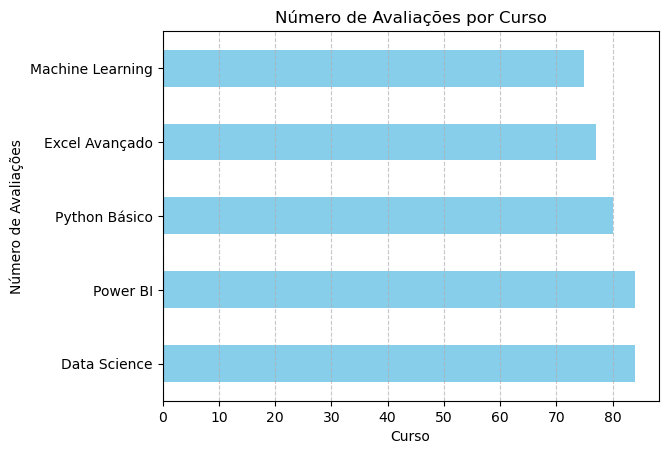

In [28]:
#Crie um gráfico de barras mostrando o número de avaliações por curso.
avaliacoesCurso = df["Curso"].value_counts()

avaliacoesCurso.plot(kind="barh", color="skyblue")
plt.title("Número de Avaliações por Curso")
plt.xlabel("Curso")
plt.ylabel("Número de Avaliações")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()